In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Question 1** 
**(Payoff and proﬁt)**

For a given derivative, payoff is the value at the time of expiration, but for the proﬁt one needs to take into account the initial investment, for instance, the derivative’s cost. Payoff/proﬁt at the expiration time in function of the underlying price are payoff/proﬁt diagram.


a. Recall the payoff of a Call option with price at maturity $S_T$ and strike price K.

Answer: 
> *Max($S_T$-K,0)*

b. If the option cost at t = 0 is c, what would be the proﬁt of the option buyer at t = T.

Answer:
> - Consider "-c" is the cost to purchase option at time T=0
> - We got two cases:


|Time|T=0|T=t|Total Profit|
|:---|:---:|:---:|---:|
|Call Option|-c|Max($S_T$-K,0)|-c*$e^{rT}$+Max($S_T$-K,0)|
|Put Option|-c|Max(K-$S_T$,0)|-c*$e^{rT}$+Max(K-$S_T$,0)|



c. Use Python to draw the payoff and proﬁt diagrams for: K = 100, c = 1 (currency unit), T = 1 (year) and either r = 0 or r = 7 (% per annum).

Answer: 
> In this question, I assumed this is a Call Option and all the calculation from buyer perspectives

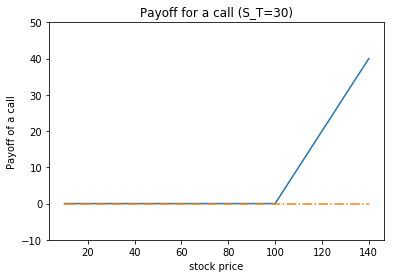

In [75]:
import numpy as np 
import matplotlib.pyplot as plt 
s = np.arange(10,150,10) 
k=100 
payoff=(abs(s-k)+s-k)/2 
plt.ylim(-10,50) 
plt.plot(s,payoff)
y2=sp.zeros(len(s)) 
plt.plot(s,y2,'-.')
plt.title("Payoff for a call (S_T=30)") 
plt.xlabel("stock price") 
plt.ylabel("Payoff of a call") 
plt.show()

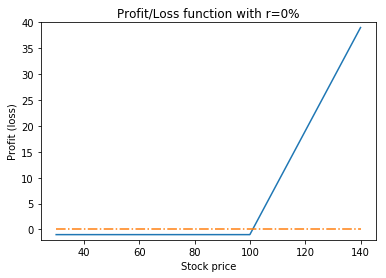

In [76]:
import scipy as sp 
import matplotlib.pyplot as plt 
s = sp.arange(30,150,10) 
k=100;c=1*math.exp(0*1)
y=(abs(s-k)+s-k)/2 -c 
y2=sp.zeros(len(s)) 
plt.ylim(-2,40) 
plt.plot(s,y) 
plt.plot(s,y2,'-.')
plt.title("Profit/Loss function with r=0%") 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)') 
plt.show()

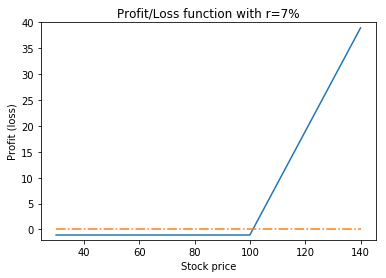

In [77]:
import scipy as sp 
import matplotlib.pyplot as plt 
s = sp.arange(30,150,10) 
k=100;c=1*math.exp(0.07*1)
y=(abs(s-k)+s-k)/2 -c 
y2=sp.zeros(len(s)) 
plt.ylim(-2,40) 
plt.plot(s,y) 
plt.plot(s,y2,'-.')
plt.title("Profit/Loss function with r=7%") 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)') 
plt.show()

# Question 2. 
(Intrinsic and time value) 

The price of a derivative can be decomposed into two components, intrinsic value (value of the derivative if exercised immediately), the rest is called the time value.

a. Use the option data sample (AAPL 01/06/2017), calculate the time value of each option.

b. Show that time values are always positive for a European Call/Put, i.e.,
C($S_t$, t; K; T) ≥ max($S_t$ − K, 0) and P($S_t$, t; K; T) ≥ max(K − $S_t$, 0).
Verify numerically this fact in the data sample.

c. Verify if time value increases with time to maturity using the same data sample.

In [3]:
#import data from google doc
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmPANey5HKtRoWSPMbvhHrUQfsn920sf1VMqwQxx3PO5r7KD9_VC2qb5Nz9KC37_VoXUMhLLoPLaN/pub?gid=1995458478&single=true&output=csv')

In [187]:
data.head()

,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,ImpliedVolatility,Delta,Gamma,Vega,Rho,OpenInterest,UnderlyingPrice,DataDate
0,AAPL,06/02/17,0.02,NaN,0.00,NaN,0.04,put,122.0,0,1.7029,-0.0046,0.0983,0.1070,NaN,81,153.18,06/01/17
1,AAPL,06/02/17,0.02,NaN,0.00,NaN,0.09,put,109.0,0,2.4536,-0.0032,0.0501,0.0786,NaN,14,153.18,06/01/17
2,AAPL,06/02/17,0.23,NaN,0.19,NaN,0.23,put,152.5,18463,0.1566,-0.2914,27.4068,2.7423,NaN,17502,153.18,06/01/17
3,AAPL,06/02/17,0.02,NaN,0.00,NaN,0.06,put,118.0,0,1.9257,-0.0041,0.0780,0.0960,NaN,50,153.18,06/01/17
4,AAPL,06/02/17,4.55,NaN,4.10,NaN,4.50,put,157.5,482,0.4620,-0.8731,5.6324,1.6626,NaN,1821,153.18,06/01/17


In [188]:
data.dtypes

Symbol                object
ExpirationDate        object
AskPrice             float64
AskSize              float64
BidPrice             float64
BidSize              float64
LastPrice            float64
PutCall               object
StrikePrice          float64
Volume                 int64
ImpliedVolatility    float64
Delta                float64
Gamma                float64
Vega                 float64
Rho                  float64
OpenInterest           int64
UnderlyingPrice      float64
DataDate              object
dtype: object

In [171]:
def poff (S,K,optiontype):
    if optiontype.lower() == 'call':
        poff = (abs(S-K)+S-K)/2 
    elif optiontype.lower() == 'put':
        poff = (abs(K-S)+K-S)/2
    else:
        poff = np.nan
    return payoff

a. Use the option data sample (AAPL 01/06/2017), calculate the time value of each option.

Answer
> Instrinsic value

In [189]:
data['intrinsic']=0
data.loc[data.PutCall == "call",'intrinsic'] = np.maximum(data[data.PutCall == "call"].UnderlyingPrice-data[data.PutCall == "call"].StrikePrice,0)
data.loc[data.PutCall == "put",'intrinsic'] = np.maximum(data[data.PutCall == "put"].StrikePrice-data[data.PutCall == "put"].UnderlyingPrice,0)

> Time values

In [190]:
#timevalues
data['timevalues']=data.AskPrice - data.intrinsic

b. Show that time values are always positive for a European Call/Put, i.e.,
C($S_t$, t; K; T) ≥ max($S_t$ − K, 0) and P($S_t$, t; K; T) ≥ max(K − $S_t$, 0).
Verify numerically this fact in the data sample.

Answer
> All of the time value is positive as they got 1860 positive values (True) - the whole dataset got 1860 variables. 

In [230]:
(data.timevalues>=0)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
1830    True
1831    True
1832    True
1833    True
1834    True
1835    True
1836    True
1837    True
1838    True
1839    True
1840    True
1841    True
1842    True
1843    True
1844    True
1845    True
1846    True
1847    True
1848    True
1849    True
1850    True
1851    True
1852    True
1853    True
1854    True
1855    True
1856    True
1857    True
1858    True
1859    True
Name: timevalues, Length: 1860, dtype: bool

c. Verify if time value increases with time to maturity using the same data sample.

Answer
> In short, it cannot be verify that Time Value increases with Time to Maturity within this sample data as we got some situations that Time to Maturity increased but Time Value reduced

In [260]:
#time to maturity in days
data['Timetomaturitydays'] = pd.to_datetime(data['ExpirationDate']) - pd.to_datetime(data['DataDate'])
data['Timetomaturitydays'] = [d.days for d in data['Timetomaturitydays']]

In [262]:
data.set_index(['PutCall','StrikePrice','Timetomaturitydays'])[['timevalues']]

timevalues
PutCall StrikePrice Timetomaturitydays            
put     122.0       1                         0.02
        109.0       1                         0.02
        152.5       1                         0.23
        118.0       1                         0.02
        157.5       1                         0.23
        117.0       1                         0.02
        155.0       1                         0.21
        165.0       1                         0.43
        175.0       1                         0.38
        160.0       1                         0.28
        180.0       1                         0.43
        162.5       1                         0.43
        167.5       1                         0.43
        190.0       1                         0.28
        195.0       1                         0.28
        200.0       1                         0.38
        119.0       8                         0.02
        124.0       8                         0.02
        146.0       8                         0.14
        149.0       8                         0.31
        138.0       8                         0.05
        172.5       8                         0.43
        148.0       8                         0.22
        155.0       8                         0.75
        160.0       8                         0.43
        165.0       8                         0.43
        145.0       8                         0.12
        117.0       8                         0.02
        137.0       8                         0.04
        141.0       8                         0.07
...                                            ...
call    177.5       15                        0.01
        175.0       15                        0.01
        205.0       15                        0.02
        170.0       15                        0.04
        225.0       15                        0.02
        155.0       1                         0.04
        165.0       8                         0.03
        187.5       8                         0.01
        182.5       15                        0.01
        187.5       29                        0.03
                    36                        0.04
        182.5       36                        0.06
        215.0       78                        0.04
        245.0       141                       0.04
        167.5       15                        0.05
        172.5       22                        0.06
        170.0       22                        0.07
        180.0       29                        0.04
        190.0       29                        0.03
        225.0       106                       0.04
                    141                       0.06
        230.0       141                       0.05
        245.0       169                       0.06
        250.0       169                       0.10
                    197                       0.07
        177.5       22                        0.04
        225.0       197                       0.16
        230.0       197                       0.14
        235.0       232                       0.16
        250.0       260                       0.15

[1860 rows x 1 columns]

# Q3.

a/ What’s the intrinsic and time value of ATM and OTM options?
At ATM and OTM: the intrinsic is zero and the time value is the price of option. Because the sum of the intrinsic and time value is the price of option

Answer
> As Table below

||Call Option|Call Option|Put Option|Put Option|
|:---|:---:|:---:|---:|
| |ATM|OTM|ATM|OTM|
| |$S_T$=K|$S_T$<K|$S_T$=K|$S_T$>K|
|Intrinsic Value|0|less than 0|0|less than 0|
|Time Value|option price|less than option price|option price|less than option price|

b/ Show that the time value of ATM/OTM European Call/Put options indeed increases with
the option’s time to maturity.

Answer
> according to answer in question a, the final Option Price will be depend on Time Value as Intrinsic value will be equal to 0 or negative. Consequently, the longer time to maturity will bring higher time value due to our expectation

c/ Verify how time value evolves with respect to the log-moneyness (log St/K) using the data
sample

In [198]:
#logmoneyness
data["logmoneyness"]=0
data['logmoneyness']=np.log(data.UnderlyingPrice/data.StrikePrice)

In [200]:
data.head(10)

,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,...,Gamma,Vega,Rho,OpenInterest,UnderlyingPrice,DataDate,intrinsic,timevalues,Timetomaturitydays,logmoneyness
0,AAPL,06/02/17,0.02,NaN,0.00,NaN,0.04,put,122.0,0,...,0.0983,0.1070,NaN,81,153.18,06/01/17,0.00,0.02,1,0.227593
1,AAPL,06/02/17,0.02,NaN,0.00,NaN,0.09,put,109.0,0,...,0.0501,0.0786,NaN,14,153.18,06/01/17,0.00,0.02,1,0.340266
2,AAPL,06/02/17,0.23,NaN,0.19,NaN,0.23,put,152.5,18463,...,27.4068,2.7423,NaN,17502,153.18,06/01/17,0.00,0.23,1,0.004449
3,AAPL,06/02/17,0.02,NaN,0.00,NaN,0.06,put,118.0,0,...,0.0780,0.0960,NaN,50,153.18,06/01/17,0.00,0.02,1,0.260929
4,AAPL,06/02/17,4.55,NaN,4.10,NaN,4.50,put,157.5,482,...,5.6324,1.6626,NaN,1821,153.18,06/01/17,4.32,0.23,1,-0.027812
5,AAPL,06/02/17,0.02,NaN,0.00,NaN,0.04,put,117.0,0,...,0.0742,0.0940,NaN,52,153.18,06/01/17,0.00,0.02,1,0.269440
6,AAPL,06/02/17,2.03,NaN,1.80,NaN,1.93,put,155.0,3528,...,13.2819,2.1650,NaN,8697,153.18,06/01/17,1.82,0.21,1,-0.011811
7,AAPL,06/02/17,12.25,NaN,11.60,NaN,12.24,put,165.0,3,...,2.0451,1.4476,NaN,4,153.18,06/01/17,11.82,0.43,1,-0.074332
8,AAPL,06/02/17,22.20,NaN,21.60,NaN,21.20,put,175.0,0,...,0.9848,1.0444,NaN,0,153.18,06/01/17,21.82,0.38,1,-0.133172
9,AAPL,06/02/17,7.10,NaN,6.60,NaN,6.82,put,160.0,0,...,3.5069,1.5038,NaN,186,153.18,06/01/17,6.82,0.28,1,-0.043560


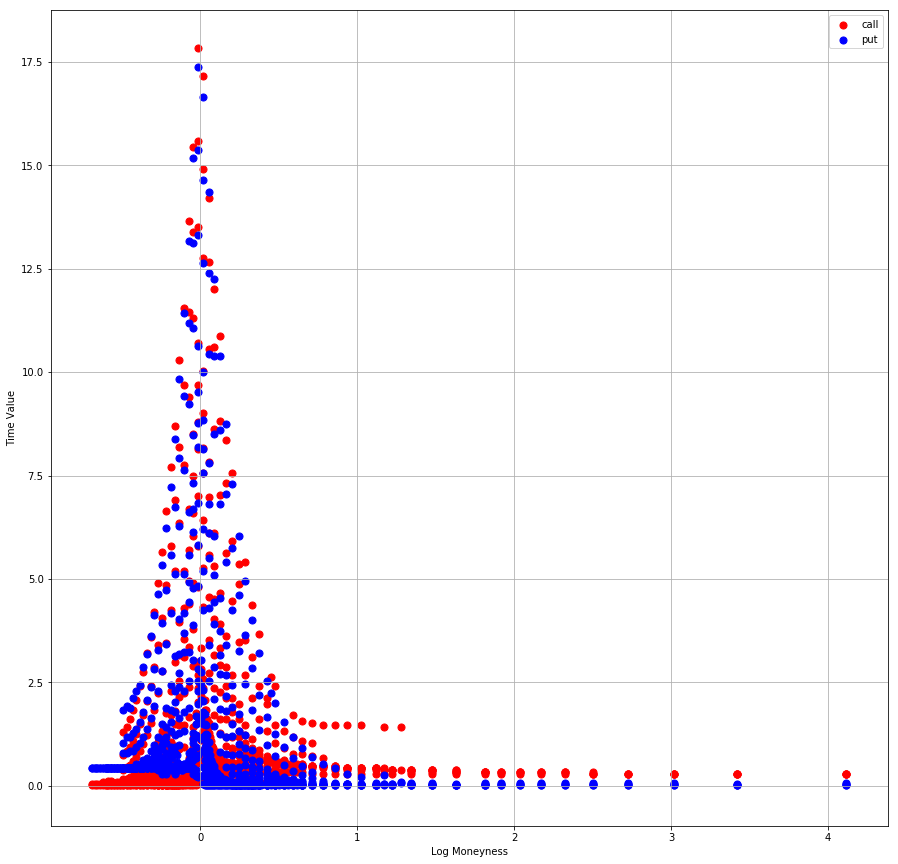

In [216]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
##data['cond'] = np.all((data['PutCall'].isin(['call']),data['ExpirationDate'].isin(['2017-07-21'])),axis=0)

plt.scatter(data.loc[data.PutCall == "call",'logmoneyness'],data.loc[data.PutCall == "call",'timevalues'],marker='o',s=50,color='r',label='call')
plt.scatter(data.loc[data.PutCall == "put",'logmoneyness'],data.loc[data.PutCall == "put",'timevalues'],marker='o',s=50,color='b',label='put')

plt.legend()
plt.grid(True)
plt.xlabel('Log Moneyness')
plt.ylabel('Time Value')
plt.show()